<br>

# Ultimate Data Science Challenge
<br>


***

## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.
***

In [1]:
# import modules

import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
# read data file

df = pd.read_json('logins.json')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
# resampling the data into 15 min increments

df['log_count'] = df['login_time']

df.set_index('login_time', inplace = True)
df_15 = df.log_count.resample('15Min').count()
df_15.head()


login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: log_count, dtype: int64

In [5]:
# checking for null

df_15[df_15.isna()]



Series([], Freq: 15T, Name: log_count, dtype: int64)

In [9]:
# extract time components for time series analysis

df_log = df_15.reset_index()

df_log['year'] = df_log['login_time'].dt.year
df_log['month'] = df_log['login_time'].dt.month
df_log['week'] = df_log['login_time'].dt.isocalendar().week
df_log['day'] = df_log['login_time'].dt.day
df_log['hour'] = df_log['login_time'].dt.hour
df_log['weekday'] = df_log['login_time'].dt.weekday # 0-6 : Mon - Sun

df_log

,login_time,log_count,year,month,week,day,hour,weekday
0,1970-01-01 20:00:00,2,1970,1,1,1,20,3
1,1970-01-01 20:15:00,6,1970,1,1,1,20,3
2,1970-01-01 20:30:00,9,1970,1,1,1,20,3
3,1970-01-01 20:45:00,7,1970,1,1,1,20,3
4,1970-01-01 21:00:00,1,1970,1,1,1,21,3
...,...,...,...,...,...,...,...,...
9783,1970-04-13 17:45:00,5,1970,4,16,13,17,0
9784,1970-04-13 18:00:00,5,1970,4,16,13,18,0
9785,1970-04-13 18:15:00,2,1970,4,16,13,18,0
9786,1970-04-13 18:30:00,7,1970,4,16,13,18,0


In [10]:
print(df_log.describe)

<bound method NDFrame.describe of               login_time  log_count  year  month  week  day  hour  weekday
0    1970-01-01 20:00:00          2  1970      1     1    1    20        3
1    1970-01-01 20:15:00          6  1970      1     1    1    20        3
2    1970-01-01 20:30:00          9  1970      1     1    1    20        3
3    1970-01-01 20:45:00          7  1970      1     1    1    20        3
4    1970-01-01 21:00:00          1  1970      1     1    1    21        3
...                  ...        ...   ...    ...   ...  ...   ...      ...
9783 1970-04-13 17:45:00          5  1970      4    16   13    17        0
9784 1970-04-13 18:00:00          5  1970      4    16   13    18        0
9785 1970-04-13 18:15:00          2  1970      4    16   13    18        0
9786 1970-04-13 18:30:00          7  1970      4    16   13    18        0
9787 1970-04-13 18:45:00          6  1970      4    16   13    18        0

[9788 rows x 8 columns]>


In [37]:
df_log.groupby('weekday')['log_count'].agg('sum')

weekday
0     8823
1     9268
2    10339
3    11960
4    15208
5    19377
6    18167
Name: log_count, dtype: int64

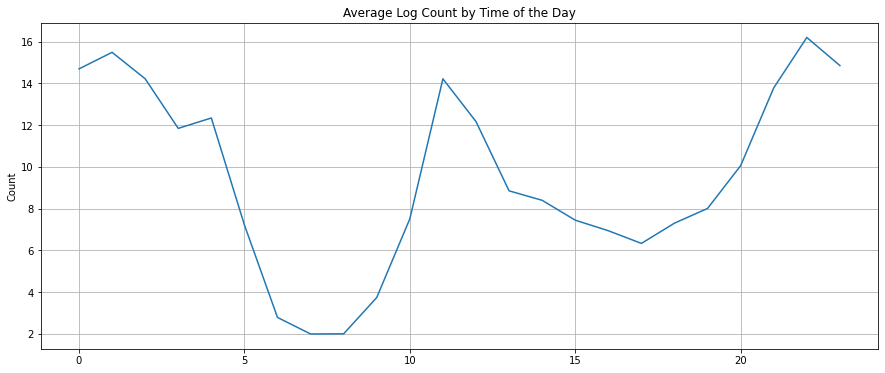

In [40]:
# plot average hourly log count 

_ = plt.figure(figsize=(15, 6))
_ = fig = df_log.groupby('hour')['log_count'].agg('mean').plot(kind='line')
_ = fig.set_title('Average Log Count by Time of the Day')
_ = fig.set_xlabel('')
_ = fig.set_ylabel('Count')
fig.grid('on', which='minor', axis='x' )
fig.grid('off', which='major', axis='x' )
fig.grid('on', which='minor', axis='y' )
fig.grid('off', which='major', axis='y' )


**Average log count by the hour indicates that people are logging in mostly between the hours of late evening to the early hours of the following day.  The log count also spikes around noon, which is most likely around lunch time.**

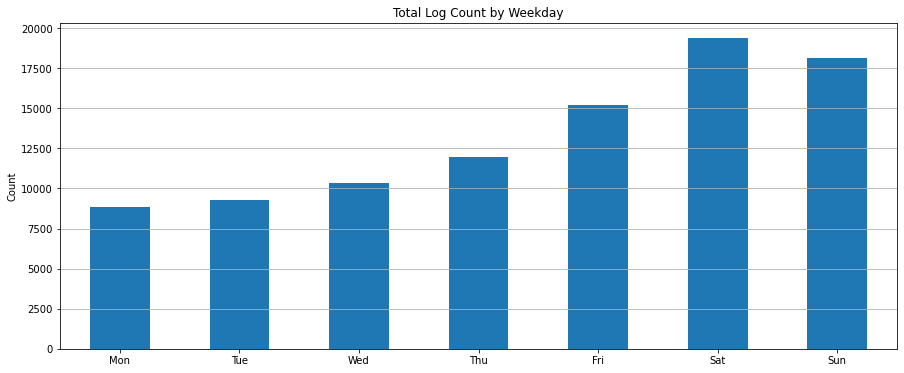

In [41]:
# plot total log count for each weekday

x_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# plot the figure
_ = plt.figure(figsize=(15, 6))
_ = fig = df_log.groupby('weekday')['log_count'].agg('sum').plot(kind='bar')
_ = fig.set_title('Total Log Count by Weekday')
#_ = fig.set_xlabel('Weekday')
_ = fig.set_xlabel('')
_ = fig.set_ylabel('Count')
_ = fig.set_xticklabels(x_labels, rotation = 0)
_ = fig.grid('on', which='minor', axis='y' )
_ = fig.grid('off', which='major', axis='y' )

**Days that have three highest log counts are Saturdays, Sundays, and Fridays, in that order.  Mondays shows the lowest log count, and it gradually increases towards its peak on Saturday.  People are logging in more on the weekend, which is expected.**

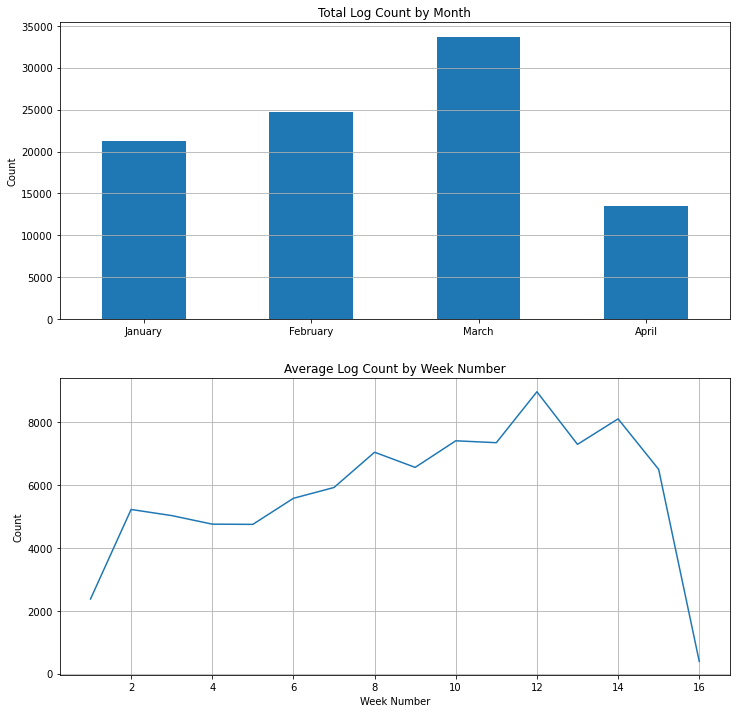

In [11]:
# plot monthly total log count and average weekly count

x_labels = ['January', 'February','March','April']

# plot the figure
_ = plt.figure(figsize=(12, 12))
_ = plt.subplot(2,1,1)
_ = fig1 = df_log.groupby('month')['log_count'].agg('sum').plot(kind='bar')
_ = fig1.set_title('Total Log Count by Month')
_ = fig1.set_xlabel('')
_ = fig1.set_ylabel('Count')
_ = fig1.set_xticklabels(x_labels, rotation = 0)
_ = fig1.grid('on', which='minor', axis='y' )
_ = fig1.grid('off', which='major', axis='y' )

_ = plt.subplot(2,1,2)
_ = fig2 = df_log.groupby('week')['log_count'].agg('sum').plot(kind='line')
_ = fig2.set_title('Average Log Count by Week Number')
_ = fig2.set_xlabel('Week Number')
_ = fig2.set_ylabel('Count')
_ = fig2.grid('on', which='minor', axis='x' )
_ = fig2.grid('off', which='major', axis='x' )
_ = fig2.grid('on', which='minor', axis='y' )
_ = fig2.grid('off', which='major', axis='y' )


**It seems the monthly total log count has been increasing between January and March.  Since we only have April data upto the 13th, it explains the sharp drop in April around the 16th week.  However, we still have full week data for week 14 and 15, so it seems login did show a drop at the beginning of the April. 
We need full April data to confirm for sure.**

In [22]:
df_monthly = df_log[['month', 'day', 'log_count']].groupby(['month', 'day']).agg('mean').reset_index()
df_monthly

,month,day,log_count
0,1,1,7.000000
1,1,2,7.093750
2,1,3,8.260417
3,1,4,8.208333
4,1,5,4.781250
...,...,...,...
98,4,9,8.520833
99,4,10,10.510417
100,4,11,14.083333
101,4,12,14.677083


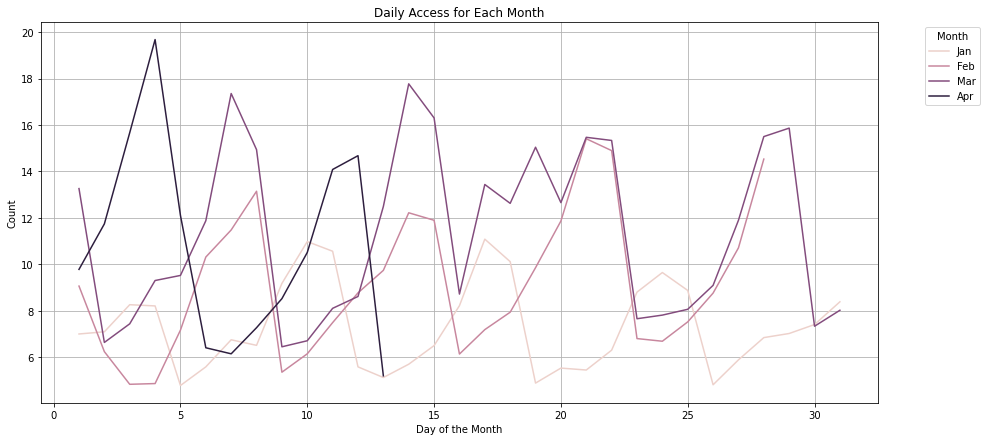

In [25]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='day', y='log_count', data=df_monthly, hue='month')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Month', labels=['Jan','Feb', 'Mar', 'Apr'])
plt.title('Daily Access for Each Month')
plt.xticks(rotation=0)
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.grid()
plt.show()

**This chart was to show whether there is any noticeable pattern in each month.  The periodical ups and downs corresponds with the weekly cycles that peaks on weekends, but other than that, I did not see any patterns/tendencies that caught my eyes.**  

***
## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
***

#### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?


I am choosing the overall sale, number of trips of before and after implementation to be the best metric in this scenario.

This experiment should affect not only the number of trips in and out of these two cities, but also the number of in-city trips by strategicly allocating more drivers from both driver partners during each city's busy time.  More availability of the driver in each city should also encourage people to take advantage of the service more.

Toll reimbursement may help us understand the effect on the in and out or between the two cities, but not all trips.

Therefore, in order for us to understand the full effect of this experiment, I believe comparing before and after overall sale and number of trips is the best metric.

***
#### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 

> **a. how you will implement the experiment**\
>First I would conduct a thorough study of numbers before the experiment implementation such as the sale, number of trips, origin and destination of each trip, how many cars are in each city at times. Based on the findings from the first step, come up a few strategies as to where and what time to allocate cars. Possibly implement the experiment in a few phases with different strategies and collect data.

> **b. what statistical test(s) you will conduct to verify the significance of the observation**\
>I believe we can use "hypothesis testing" method to see how effective this experiment would be.  By comparing the "before" data and "after" data, we can determine how effective this experiment worked.

> **c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.**\
>By comparing the before and after data, we analyze how effectively drivers from driver partners are allocated.  Analysis should include visual presentation of the comparison of the two, and how effective this experiment was.  We can then make the recommendation of how to allocate the drivers more effectively by time and location.  We may even be able to point out some redundancies, if any, by studying the stand-by time of the drivers. 


***
## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

**Data description**\
● city: city this user signed up in\
● phone: primary device for this user\
● signup_date: date of account registration; in the form ‘YYYY MM DD’\
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’\
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup\
● avg_rating_by_driver: the rider’s average rating over all of their trips\
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips\
● surge_pct: the percent of trips taken with surge multiplier > 1\
● avg_surge: The average surge multiplier over all of this user’s trips\
● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up\
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise\
● weekday_pct: the percent of the user’s trips occurring during a weekday
***

In [3]:
# import modules

import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# read json data

df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


***
### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [6]:
# filling missing "avg_rating_of_driver" and "avg_rating_by_driver" with their average

df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)

In [7]:
# forward filling missing phone OS
df['phone'].ffill(axis = 0, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [8]:
#df['last_trip_date'].dt.datetime()

df['signup_date'] =  pd.to_datetime(df['signup_date'])
df['last_trip_date'] =  pd.to_datetime(df['last_trip_date'])
#df['signup_date1'] =  pd.to_datetime(df['signup_date'], format='%Y-%M-%d')
#df['last_trip_date1'] =  pd.to_datetime(df['last_trip_date'], format='%Y-%M-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [9]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [10]:
# find min & max dates for signup date and last trip date

print("Min Signup Date:",  df['signup_date'].min())
print("Min Last Trip Date:",df['last_trip_date'].min())

print("Max Signup Date:",df['signup_date'].max())
print("Max Last Trip Date:", df['last_trip_date'].max())


Min Signup Date: 2014-01-01 00:00:00
Min Last Trip Date: 2014-01-01 00:00:00
Max Signup Date: 2014-01-31 00:00:00
Max Last Trip Date: 2014-07-01 00:00:00


**Since last trip date is 2014-07-01, anyone who has traveled 30 days prior to that day, 2014-06-01, qualifies as active user.**

In [11]:
# add "active" column ( 1 = active user, 0 = non-active user)
df['active'] = np.where(df['last_trip_date'] > '2014-06-01', 1, 0)

# add "ult_black_user" column ( 1 = active Black user, 1 = non-active Black user)
df['ult_black_user'] = np.where(df['ultimate_black_user'] == True, 1, 0)

df.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,ult_black_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0


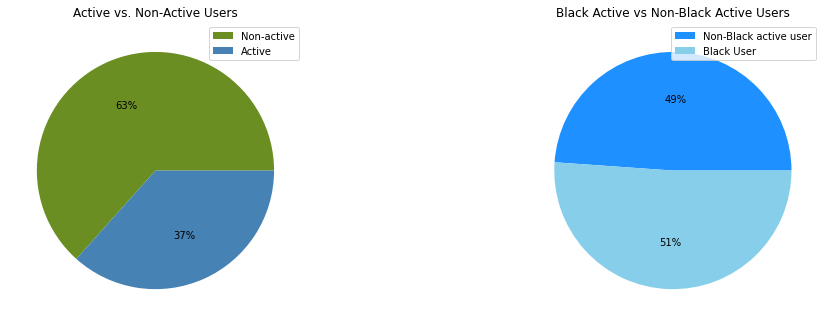

In [12]:
fig = plt.figure(figsize=(17, 12))
ax = fig.add_subplot(221)
df_active = df.groupby('active')['active'].agg('count')
                                                                
_ = ax = df_active.plot.pie(labels=None, autopct='%1.0f%%', colors = ['olivedrab', 'steelblue'], \
                            title = 'Active vs. Non-Active Users')
_ = ax.legend(["Non-active", "Active"])
_ = plt.ylabel('')

ax = fig.add_subplot(222)
df_act = df[df['active']==1]
#df_black_user = df_act.groupby('ultimate_black_user')['ultimate_black_user'].agg('count')
df_black_user = df_act.groupby('ult_black_user')['ult_black_user'].agg('count')

#df_black_user
_ = ax = df_black_user.plot.pie(labels=None, autopct='%1.0f%%', colors = ['dodgerblue', 'skyblue'], \
                                title = 'Black Active vs Non-Black Active Users')
_ = ax.legend(["Non-Black active user", "Black User"])
_ = plt.ylabel('')

**Approx. 37% of those signed up are active users, and 51% of the active users are Black Users.**

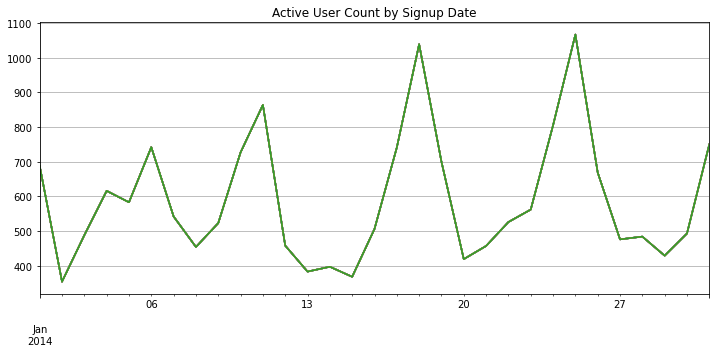

In [16]:
# Active User Count by Signup Date

df_active_d = df[df['active'] == 1].groupby(['signup_date']).agg('count')
figure = df_active_d.plot(kind = 'line', figsize=(12, 5), grid = True, legend = False, title = "Active User Count by Signup Date")
figure.xaxis.label.set_visible(False)


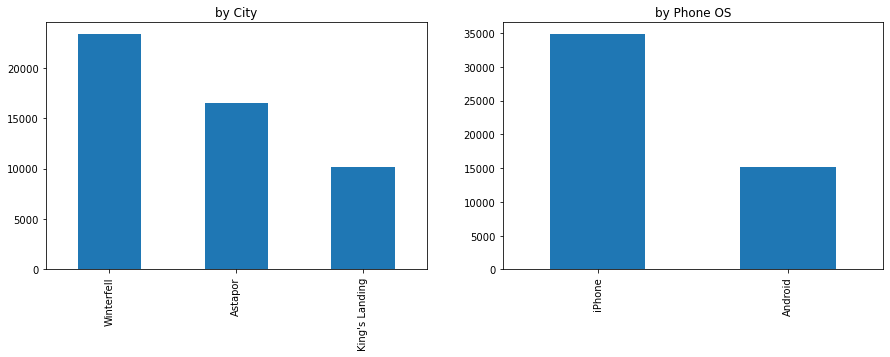

In [33]:
# plot active users by city and by Phone OS

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(221)
df_city = df.groupby(['city'])['city'].agg('count').sort_values(ascending = False)
df_city.plot(kind = 'bar', title = 'by City')
ax.xaxis.label.set_visible(False)

ax = fig.add_subplot(222)
df_phone = df.groupby(['phone'])['phone'].agg('count').sort_values(ascending = False)
df_phone.plot(kind = 'bar', title = 'by Phone OS')
ax.xaxis.label.set_visible(False)

plt.show()


**Active Users signed up most in Winterfell, and they are more likely to have iPhone as main device.**

***
### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. 
  Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

**For Machine Learning model, I chose Random Forest.
Typically, Random Forest and Gradient Boosting are most commonly used for this type of classification problems for their high accuracy.  However, Gradient Boosting is known to be easier to overfit, and for that, I think Random Forest is a preferred model.**

In [34]:
# drop non-numerical columns

df.drop(['signup_date', 'last_trip_date', 'ultimate_black_user'], axis = 1, inplace = True)


In [35]:
# prep data and format categorical data with get_dummies

df_dummy = pd.get_dummies(df)
df_dummy.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,ult_black_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1,0,1,0,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,1,0,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,0,1,0,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,0,1,1,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [37]:
X = df_dummy.drop('active', axis = 1)
y = df_dummy['active']
#y = df_dummy.drop('active', axis = 1)

In [38]:
# function to plot feature importance

def feature_importance(model, X, top):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        ordered = importances[indices].reshape(-1,)
        cols = X.columns[indices]
        return pd.DataFrame({'variables': cols[:top], 'importances':ordered[:top]}).plot.bar(x='variables', y='importances')

In [39]:
# split data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 13)
(10000, 13)
(40000,)
(10000,)


In [41]:
# hyperparameter tuning

rf_model = RandomForestClassifier(random_state=42)

n_estimators = [10, 100, 500]
max_features = ['sqrt', 'log2']

# define grid search and fit the hyperparameter list
param_rf = dict(n_estimators = n_estimators, max_features = max_features)

grid_rf = GridSearchCV(rf_model, param_grid = param_rf, cv = 3, n_jobs = -1)
best_rf = grid_rf.fit(X_train, y_train)

In [42]:
print("Best Parameter:", grid_rf.best_params_)
print("Best Score:", grid_rf.best_score_)

Best Parameter: {'max_features': 'sqrt', 'n_estimators': 100}
Best Score: 0.763974967830773


**With this model, we can expect 76.4% of accuracy.**

In [43]:
# predict test data with best parameters

rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      6286
           1       0.69      0.66      0.68      3714

    accuracy                           0.76     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.76      0.76      0.76     10000



In [46]:
a_score = accuracy_score(y_test, y_pred)
confusion_m = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", confusion_m)

Confusion Matrix:
 [[5174 1112]
 [1252 2462]]


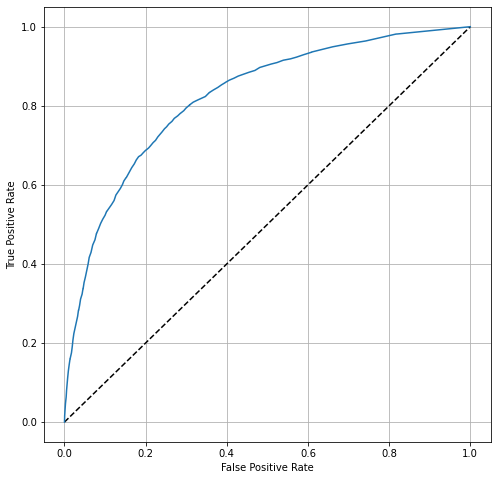

AUC Score: 0.82


In [49]:
# get roc/auc info
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# make the plot
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr)        
plt.show()


print("AUC Score:", round(roc_auc_score(y_test, y_pred_prob),2))

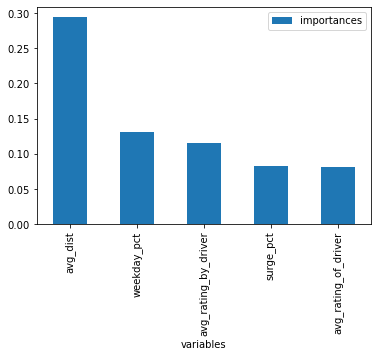

In [48]:
_ = feature_importance(rf, X_test, top=5)

***
### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).


**Top three most important features that seem to influence retainability are:**\
   1. Average Distance
   2. Weekday Percentage
   3. Average Rating by Driver
    
**Recommendations**

**Ultimate might consider launching some insentives or promotions to encourage longer trips and weekday trips for the new users as we may be able to expect most impact on retaining users.\
Also, on top of re-educating the drivers, conduct further research as to what can be improved on the drivers is recommended.** 